## Dependencies

Original:


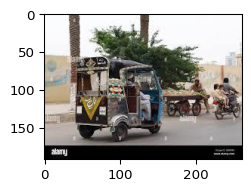

In [1]:
import imageio
import imgaug as ia
%matplotlib inline
import os.path
import shutil
import glob
from tempfile import mkstemp
from shutil import move, copymode, copyfile, copy
from os import fdopen, remove, listdir
from imgaug import augmenters as iaa
ia.seed(4)


image = imageio.imread('./test_image/motorbikerickshawintrafficpakistan16.jpg')

print("Original:")
ia.imshow(image)

## Testing augmentation combinations

Augmented batch:


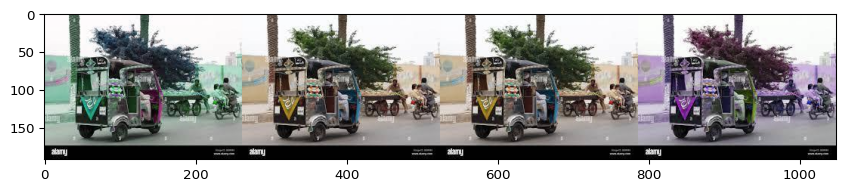

In [161]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    # iaa.AdditiveGaussianNoise(scale=(10, 60)),
    # iaa.Crop(percent=(0, 0.2)),
    # iaa.ChannelShuffle(0.1),
    # iaa.CoarseDropout(0.01),
    # iaa.BlendAlphaSimplexNoise(iaa.EdgeDetect(1.0)),
    # iaa.MotionBlur(angle=0),
    # iaa.MultiplyHueAndSaturation(),
    # iaa.GammaContrast(gamma=(0.6,1.5),per_channel=True),
    # iaa.SigmoidContrast(gain=(3,10)),
    # iaa.Canny(0.1),
    iaa.Fliplr(0.05),
    # iaa.Flipud(0.05),
    iaa.PerspectiveTransform(scale=(0.01, 0.15)),
    # iaa.Snowflakes(),
    # iaa.Rain()
])

seq = iaa.Sequential([
    # iaa.Affine(rotate=(-25, 25)),
    # iaa.AdditiveGaussianNoise(scale=(10, 60)),
    # iaa.Crop(percent=(0, 0.2)),
    iaa.ChannelShuffle(0.2),
    # iaa.CoarseDropout(0.01),
    # iaa.BlendAlphaSimplexNoise(iaa.EdgeDetect(1.0)),
    # iaa.MotionBlur(angle=0),
    # iaa.MultiplyHueAndSaturation(),
    # iaa.GammaContrast(gamma=(0.6,1),per_channel=True),
    # iaa.SigmoidContrast(gain=(3,10)),
    # iaa.Canny(0.1),
    # iaa.Fliplr(0.05),
    # iaa.Flipud(0.05),
    # iaa.PerspectiveTransform(scale=(0.01, 0.05)),
    # iaa.Snowflakes(),
    # iaa.Rain()
], random_order=True)

images_aug = seq(images=images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

# print("Augmented:")
# # ia.imshow(np.hstack(images_aug))
# for i in range(32):
#     imageio.imwrite(''+str(i)+'new.jpg', images_aug[i]) 

## Setting augmentation combinations

In [2]:
seq = iaa.Sequential([
    # iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    # iaa.Crop(percent=(0, 0.2)),
    iaa.ChannelShuffle(0.2),
    iaa.CoarseDropout(0.01),
    # iaa.BlendAlphaSimplexNoise(iaa.EdgeDetect(1.0)),
    iaa.MotionBlur(angle=0),
    iaa.MultiplyHueAndSaturation(),
    iaa.GammaContrast(gamma=(0.6,1.5),per_channel=True),
    iaa.SigmoidContrast(gain=(3,10)),
    # iaa.Canny(0.1),
    # iaa.Fliplr(0.05),
    # iaa.Flipud(0.05),
    # iaa.PerspectiveTransform(scale=(0.01, 0.15)),
    # iaa.Snowflakes(),
    # iaa.Rain()
], random_order=True)

## Augment and save files

In [3]:

f = listdir('./augmented_test')
# print(f)
path = './augmented_test/'
for file in f:
    if '.jpg' in file and '_' not in file:
        # print(file)
        try:
            image = image = imageio.imread(path+file)
            images_aug = [seq(image=image) for _ in range(10)]
        
            # print("Augmented:")
            name = file.split('.jpg')[0]
            # ia.imshow(ia.draw_grid(images_aug, cols=4, rows=5))
            for i in range(10):
                imageio.imwrite('./augmented_test/'+name+'_'+str(i)+'.jpg', images_aug[i])
                shutil.copyfile('./augmented_test/'+name+'.txt', './augmented_test/'+name+'_'+str(i)+'.txt')
        except:
            print(file, 'not done')
    

bus000000509358.jpg not done


In [100]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    # iaa.Crop(percent=(0, 0.2)),
    iaa.ChannelShuffle(0.2),
    iaa.CoarseDropout(0.01),
    # iaa.BlendAlphaSimplexNoise(iaa.EdgeDetect(1.0)),
    iaa.MotionBlur(angle=0),
    iaa.MultiplyHueAndSaturation(),
    iaa.GammaContrast(gamma=(0.6,1.5),per_channel=True),
    iaa.SigmoidContrast(gain=(3,10)),
    # iaa.Canny(0.1),
    iaa.Fliplr(0.05),
    # iaa.Flipud(0.05),
    iaa.PerspectiveTransform(scale=(0.01, 0.15)),
    # iaa.Snowflakes(),
    # iaa.Rain()
], random_order=True)

images_aug = [seq(image=image) for _ in range(20)]

print("Augmented:")
# ia.imshow(ia.draw_grid(images_aug, cols=4, rows=5))
for i in range(20):
    imageio.imwrite('./aug/motorbikerickshawintrafficpakistan16'+'_'+str(i)+'.jpg', images_aug[i])
    shutil.copyfile('./test_image/motorbikerickshawintrafficpakistan16.txt', './aug/motorbikerickshawintrafficpakistan16'+'_'+str(i)+'.txt')

Augmented:


In [2]:
from matplotlib import pyplot as plt
count =  {'1':0, '2': 0, '3':0, '4':0, '5':0, '6':0, '7':0, '0': 0}
# path = './images/'

for file in glob.glob('./images/*.txt'):  
    # print(fg
    # name = file.split('.'g
    myfile = open(file,"r")
    lines = myfile.readlines()
    for line in lines:
        count[line.split()[0]] = count.get(line.split()[0], 0) +1
    
print(count)

classes = {
    'bicycle': count['0'],
    'car': count['1'],
    'motorbike': count['2'],
    'aeroplane': count['3'],
    'bus': count['4'],
    'train': count['5'],
    'truck': count['6'],
    'rickshaw': count['7']
}

keys= classes.keys()
values= classes.values()

print(classes)

{'1': 834, '2': 955, '3': 104, '4': 652, '5': 0, '6': 593, '7': 562, '0': 748}
{'bicycle': 748, 'car': 834, 'motorbike': 955, 'aeroplane': 104, 'bus': 652, 'train': 0, 'truck': 593, 'rickshaw': 562}


In [4]:
count =  {'1':834-564, '2': 955-564, '3':0, '4':652-564, '5':0, '6':593-564, '7':0, '0': 748-564}
print(count)

for file in glob.glob('./images/*.txt'):  
    # print(file)
    name = file.split('.txt')[0]
    # print(file, name)
    myfile = open(file,"r")
    lines = myfile.readlines()
    for line in lines:
        if '000' in file and count[line.split()[0]] != 0:
            count[line.split()[0]] = count.get(line.split()[0], 0) -1
        else:
            copy(file, './img/')
            copy(name+'.jpg', './img')
            # pass
            
# print(count)

{'1': 270, '2': 391, '3': 0, '4': 88, '5': 0, '6': 29, '7': 0, '0': 184}


In [ ]:
classes = {'0':'0', '1':'1','2':'2','4':'3','6':'4','7':'5'}

for file in glob.glob('./aug/*.txt'): 
    name = file.split('.txt')[0]
    myfile = open(file,"r")
    lines = myfile.readlines()
    for line in lines:
        if line.split() == '3':
            print(file)
            